In [1]:
%matplotlib inline 

In [2]:
# import libraries
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms
import torchvision.models
from torchvision.io import read_image
import face_recognition
from matplotlib import pyplot as plt

In [3]:
# define model
class HappyFaceClassifier_alex(nn.Module):
    def __init__(self):
        super(HappyFaceClassifier_alex, self).__init__()
        self.name = "HFC_alex"
        self.fc1 = nn.Linear(256*6*6, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = x.view(-1, 256*6*6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [4]:
# extract human faces in an image as ROI using existing library
def Face_Extraction(image_path):
    # read the input image
    
    image = face_recognition.load_image_file(image_path)

    # find face locations
    face_locations = face_recognition.face_locations(image)
    
    # save extracted face image in dictionary 
    # {face_num: face_image_array}
    face_num = 1
    face_dict = {}
    for (top, right, bottom, left) in face_locations:
        face_dict[face_num] = image[top:bottom, left:right]  
        face_num += 1
    
    return face_dict

In [5]:
# extract human faces in an image as ROI using existing library
def Face_Extraction(image_path):
    # read the input image
    image = face_recognition.load_image_file(image_path)

    # find face locations
    face_locations = face_recognition.face_locations(image)
    
    # save extracted face image in dictionary 
    # {face_num: face_image_array}
    face_num = 1
    face_dict = {}
    for (top, right, bottom, left) in face_locations:
        face_dict[face_num] = image[top:bottom, left:right]  
        face_num += 1
    
    return face_dict

In [6]:
def Face_Classifier(image_array):
    # define image
    image = torch.tensor(np.transpose(image_array, (2, 1, 0)))
    # resize image to fit model (3x224x224)
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.Grayscale(3)])
    image = transform(image).unsqueeze(dim=0)
    
    # define trained models
    model = HappyFaceClassifier_alex()
    pretrained_model = torchvision.models.alexnet(pretrained=True)
    model_path = './weights/model_HFC_alex_bs512_lr0.005_epoch8'
    state = torch.load(model_path)
    model.load_state_dict(state)
    
    # feature extraction
    features = pretrained_model.features(image/255)
    # model prediction
    output = model(features)
    pred = (output > 0.0).squeeze().long()
    if pred == 1:
        print("This person is happy.")
        return True
    else:
        print("This person is not happy.")
        return False

In [7]:
def Happy_Face_Recognition(image_path):
    # display image
    image_input = Image.open(image_path)
    plt.imshow(np.asarray(image_input))
    plt.show()
    
    # extract faces in the image
    face_dict = Face_Extraction(image_path)
    
    nonhappy_face_dict = {}
    # loop over extracted faces
    for face_num in face_dict:
        face_image_array = face_dict[face_num]
        
        # show extracted faces
        plt.imshow(face_image_array)
        plt.show()
        
        # recognize happy facial expression
        if Face_Classifier(face_image_array) == False:
            nonhappy_face_dict[face_num] = face_image_array
            
    return nonhappy_face_dict

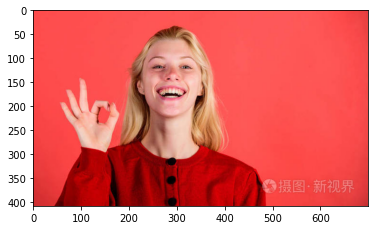

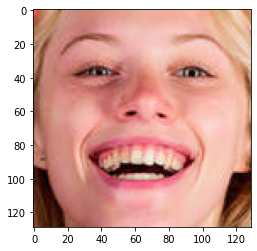

This person is happy.


In [8]:
# Input: image directory
image_path = './examples/happy_1.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

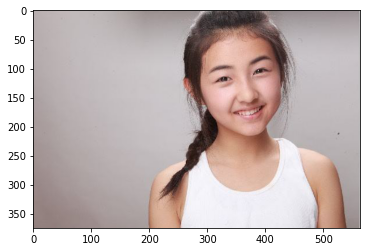

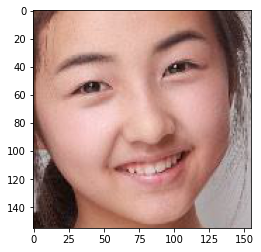

This person is happy.


In [9]:
# Input: image directory
image_path = './examples/happy_2.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

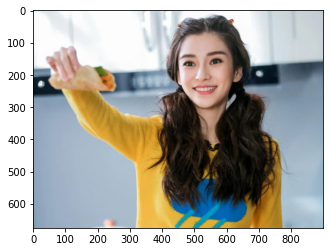

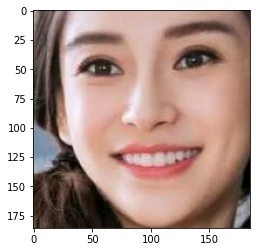

This person is happy.


In [10]:
# Input: image directory
image_path = './examples/happy_3.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

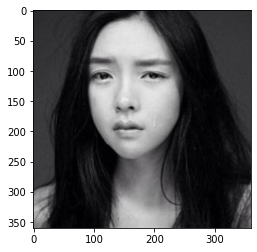

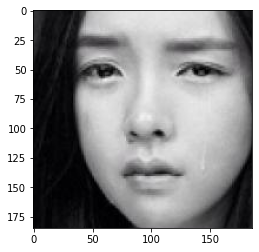

This person is not happy.


In [11]:
# Input: image directory
image_path = './examples/sad_1.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

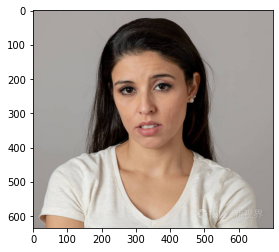

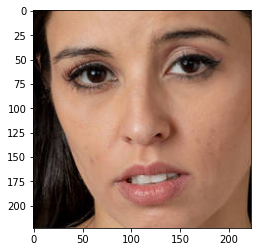

This person is not happy.


In [12]:
# Input: image directory
image_path = './examples/sad_2.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

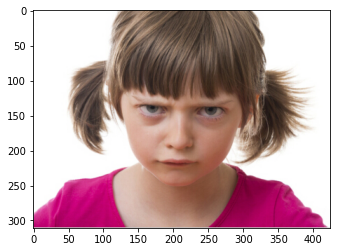

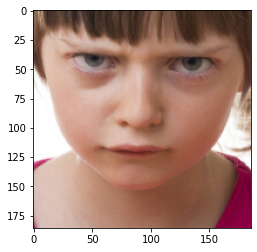

This person is not happy.


In [13]:
# Input: image directory
image_path = './examples/angry_1.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

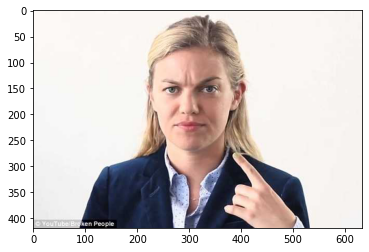

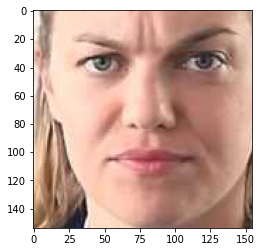

This person is not happy.


In [14]:
# Input: image directory
image_path = './examples/angry_2.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

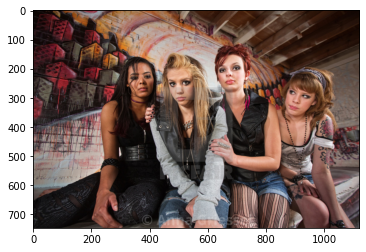

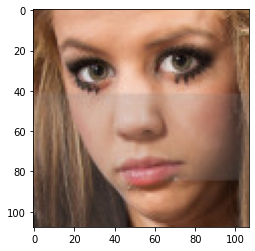

This person is not happy.


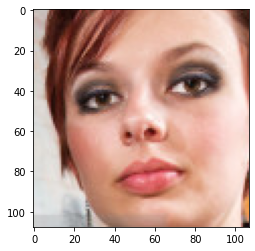

This person is not happy.


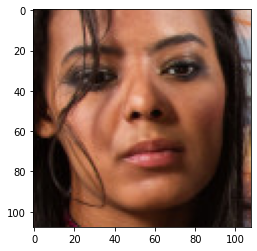

This person is not happy.


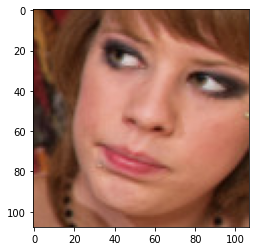

This person is not happy.


In [15]:
# Input: image directory
image_path = './examples/group_1.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

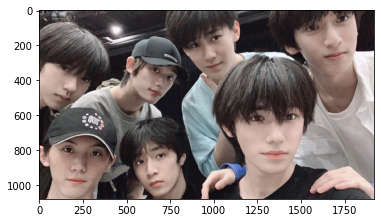

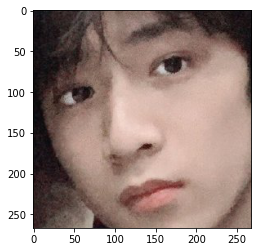

This person is not happy.


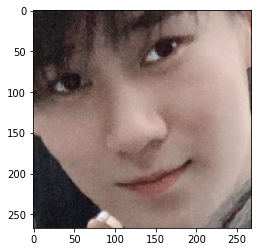

This person is happy.


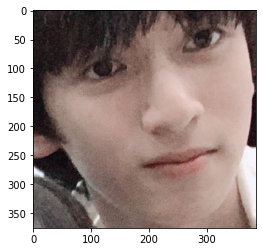

This person is happy.


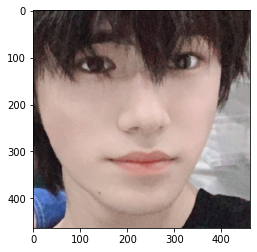

This person is happy.


In [16]:
# Input: image directory
image_path = './examples/group_2.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

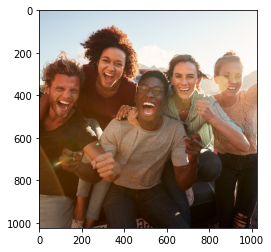

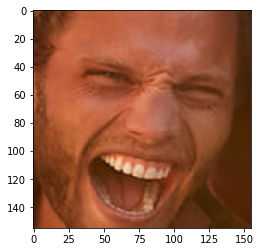

This person is happy.


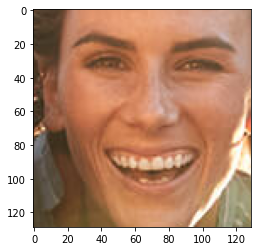

This person is happy.


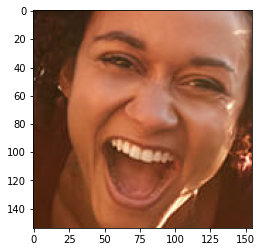

This person is happy.


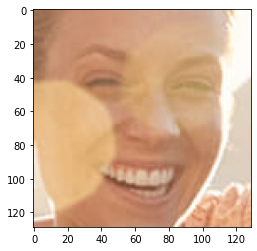

This person is happy.


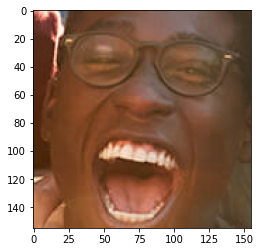

This person is happy.


In [17]:
# Input: image directory
image_path = './examples/group_3.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)

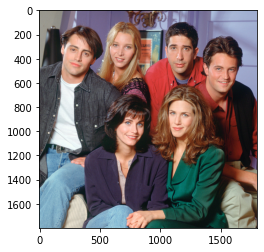

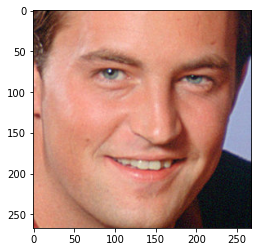

This person is happy.


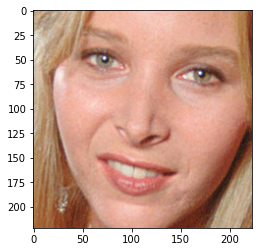

This person is happy.


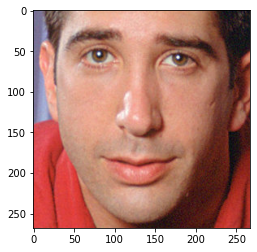

This person is not happy.


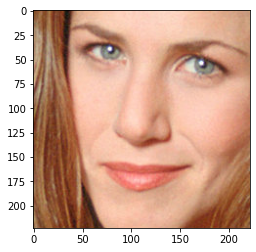

This person is happy.


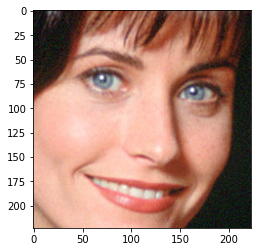

This person is happy.


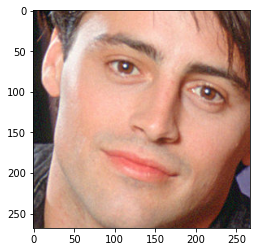

This person is not happy.


In [18]:
# Input: image directory
image_path = './examples/group_4.jpg'

# Apply happy face recognition
nonhappy_face_dict = Happy_Face_Recognition(image_path)